In [ ]:
#미국 GMO 데이터 프린트 하기
import pandas as pd

data = pd.read_csv('uscrop.csv')
df = pd.DataFrame(data)

#필요없는 정보의 column 지우기
df = df.drop(['Table'], axis=1)

# 2023년에 미국 전체 GMO 퍼센테이지 필터링
filtered_df = df[(df['State/Year'] == 'United States') & (df['Year'] == 2023)]
#숫자로 표현가능하게 만들고 순차적으로 데이터 구성
filtered_df['Value'] = pd.to_numeric(filtered_df['Value'])


#y축을 상승하는 order로 표현하기 위한 sorting 기능
sorted_df = filtered_df.sort_values(by='Value')

# 인덱스 넘버를 지움으로써 헷갈리는거 방지
print(sorted_df.to_string(index=False))


                                                            Attribute    State/Year  Year  Value
            Insect-resistant (Bt) only (percent of all corn planted)  United States  2023      3
Insect-resistant (Bt) only (percent of all upland cotton planted)     United States  2023      3
 Herbicide-tolerant (HT) only (percent of all upland cotton planted)  United States  2023      8
          Herbicide-tolerant (HT) only (percent of all corn planted)  United States  2023      9
                 Stacked gene varieties (percent of all corn planted) United States  2023     82
        Stacked gene varieties (percent of all upland cotton planted) United States  2023     86
                    All GE varieties (percent of all corn planted) 3/ United States  2023     93
       Herbicide-tolerant (HT) only (percent of all soybeans planted) United States  2023     95
                   All GE varieties (percent of all soybeans planted) United States  2023     95
           All GE varieties (p

<ipython-input-21-e61a9555925a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Value'] = pd.to_numeric(filtered_df['Value'])


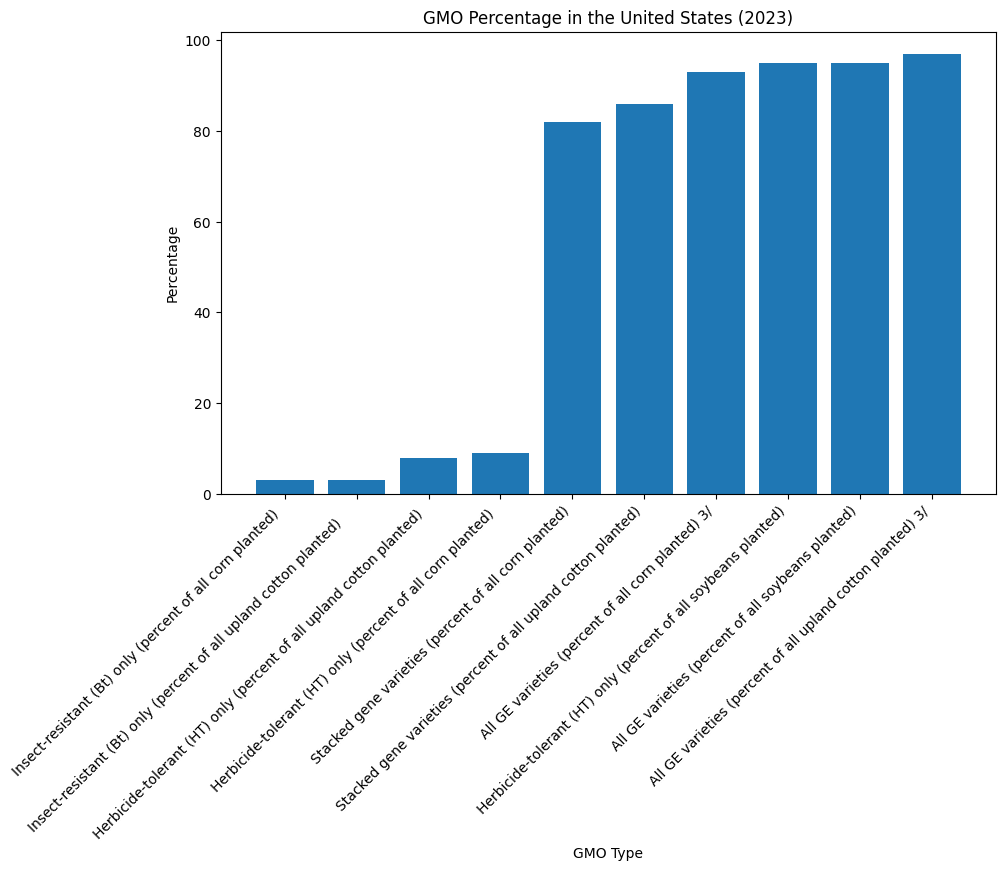

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_df['Attribute'], sorted_df['Value'])
plt.xlabel('GMO Type')
plt.ylabel('Percentage')
plt.title('GMO Percentage in the United States (2023)')
plt.xticks(rotation=45, ha='right')

plt.show()

In [ ]:
#그 upland cotton planted가 어떤 지역에서 가장 많이 자라고 있는지
#"All GE varieties (percent of all upland cotton planted) 3/"

#Other States 1/ 컬럼과 United States 을 제외한 2023년 미국지역 백분율

#필요한 지점 필터링
filtered_df2 = df[(df['State/Year'] != 'Other States 1/') & (df['State/Year'] != 'United States') &
(df['Year'] == 2023) & (df['Attribute'] == 'All GE varieties (percent of all upland cotton planted) 3/')]

filtered_df2['Value'] = pd.to_numeric(filtered_df2['Value'])

max_row = filtered_df2.loc[filtered_df2['Value'].idxmax()]


print("State/Year with the highest Value:")
print(max_row[['State/Year', 'Value']])

#Alabama에서 upland cotton plant가 가장 많이 plant 되는 것으로 예측 (미국의 upland cotton의 99%)

State/Year with the highest Value:
State/Year    Alabama 2/
Value                 99
Name: 2327, dtype: object


<ipython-input-28-b6fd3300c019>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2['Value'] = pd.to_numeric(filtered_df2['Value'])
